## Load Data

In [1]:
import numpy as np
import pandas as pd

In [3]:
adult = pd.read_csv("adult.csv")
adult = adult.drop(['fnlwgt'], axis =1)
# adult.head()

## 1 Classification 

### Q1 
Create a table in the report stating the following information about the adult data set: (i) number of instances, (ii) number of missing values, (iii) fraction of missing values over all attribute values, (iv) number of instances with missing values and (v) fraction of instances with missing values over all instances.

In [5]:
## (i) number of instances
num_ins = len(adult)  
print "number of instances: ",num_ins

## (ii) num of missing values
na = adult.isnull().sum().sum()
na = na.astype('float64')
print "num of missing values: ", na  

## all attribute values
all_attr = adult.count().sum()
# all_attr  677323

## (iii) fraction of missing values over all attribute values
p_na_attr = round(na/all_attr,4)
p_na_attr = '%.2f%%' % (p_na_attr * 100)
print "fraction of missing values over all attribute values: ", p_na_attr

## (iv) num of instances with missing values
na_ins = sum([True for idx,row in adult.iterrows() if any(row.isnull())])  
print "num of instances with missing values: ", na_ins

## (v) fraction of instances with missing values over all instances
p_na_ins = round(na_ins/float(num_ins), 4)
p_na_ins = '%.2f%%' % (p_na_ins * 100)
print "fraction of instances with missing values over all instances: ", p_na_ins

number of instances:  48842
num of missing values:  6465.0
fraction of missing values over all attribute values:  0.95%
num of instances with missing values:  3620
fraction of instances with missing values over all instances:  7.41%


In [4]:
information = ["number of instances", "number of missing value", "fraction of missing values over all attribute values", 
               "number of instances with missing values", "fraction of instances with missing values over all instances"]

In [6]:
counts = [num_ins, na, p_na_attr, na_ins, p_na_ins]

In [7]:
df = pd.DataFrame(zip(information, counts), columns = ["information", "counts"])
df

,information,counts
0,number of instances,48842
1,number of missing value,6465
2,fraction of missing values over all attribute ...,0.95%
3,number of instances with missing values,3620
4,fraction of instances with missing values over...,7.41%


### Q2 
Convert all 13 attributes into nominal using a Scikit-learn LabelEncoder. Then, print the set of all possible discrete values for each attribute.

In [8]:
from sklearn.preprocessing import LabelEncoder
df = adult.dropna()
nom = df.apply(LabelEncoder().fit_transform)
len(nom)

45222

In [9]:
for i in range(len(nom.iloc[0,:13])):
    print "%s : "%(nom.keys()[i]),sorted(nom.iloc[:,i].unique())

age :  [0, 1, 2, 3, 4]
workclass :  [0, 1, 2, 3, 4, 5, 6]
education :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
education-num :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
marital-status :  [0, 1, 2, 3, 4, 5, 6]
occupation :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
relationship :  [0, 1, 2, 3, 4, 5]
race :  [0, 1, 2, 3, 4]
sex :  [0, 1]
capitalgain :  [0, 1, 2, 3, 4]
capitalloss :  [0, 1, 2, 3, 4]
hoursperweek :  [0, 1, 2, 3, 4]
native-country :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


### Q3 
Ignore any instance with missing value(s) and use Scikit-learn to build a decision tree for classifying an individual to one of the <= 50K and > 50K categories. Compute the error rate of the resulting tree.

In [77]:
## 把每個rows用決策術依照class分成兩類
from sklearn.model_selection import train_test_split
from sklearn import tree

In [79]:
without_na = adult.dropna()
# len(without_na)
nom1 = without_na.apply(LabelEncoder().fit_transform)
nom1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,5,9,12,4,0,1,4,1,1,0,2,38,0
1,3,4,9,12,2,3,0,4,1,0,0,0,38,0
2,2,2,11,8,0,5,1,4,1,0,0,2,38,0
3,3,2,1,6,2,5,0,2,1,0,0,2,38,0
4,1,2,9,12,2,9,5,2,0,0,0,2,4,0


In [81]:
## the former 12 attrbutes' vector
data = []
for i in range(len(nom1)):
    a = nom1.iloc[i,0:13].tolist()
    data.append(a)
data = np.asarray(data)
# print data

In [82]:
target = nom1.iloc[:,13].tolist()
# target

In [83]:
## create decision tree classifier and train
train_data, test_data, train_label, test_label = train_test_split(data, target, test_size=0.2, random_state=0)
tree = tree.DecisionTreeClassifier(random_state=0)
tree.fit(train_data, train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [84]:
## calculate the error rate (by python script)
error = 0
for i, v in enumerate(tree.predict(test_data)):
    if v != test_label[i]:
        error+=1
e_rate = error/float(len(test_label))
print 'error rate: ', e_rate

error rate:  0.176229961305


In [ ]:
# DataMining CW1 Part1

#---- Q1: Classification
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import sklearn.model_selection as model_select
import sklearn.tree as tree
import numpy as np

adult_df = pd.read_csv('adult.csv')
# drop unneeded attribute
adult_df = adult_df.drop(['fnlwgt'], axis = 1)
len(adult_df.columns)

#---- Q1-1
#---- 1-1(i) number of instances
Ins_total = len(adult_df) # number of instances
print 'Q1-1(i):', Ins_total

#---- 1-1(ii) number of missing values
na_byCol = adult_df.isnull().sum() # missing values in each column
na_values = na_byCol.sum() # total number of missing values
print 'Q1-1(ii):', na_values

#---- 1-1(iii) fraction of missing values over all attribute values
val_total = len(adult_df) * len(adult_df.columns)
na_val_frac = float(na_values) / float(val_total)
print 'Q1-1(iii):', na_val_frac

#---- 1-1(iv) number of instances with missing values
na_insCount = adult_df.isnull().any(axis=1).sum()
print 'Q1-1(iv):', na_insCount

#---- 1-1(v) fraction of instances with missing values over all instances.
na_Ins_frac = float(na_insCount) / float(Ins_total)
print 'Q1-1(v):', na_Ins_frac

# put results into a table
Q1_1Lst = [Ins_total, na_values, na_val_frac, na_insCount, na_Ins_frac]
Q1_1Table = pd.DataFrame(Q1_1Lst, ['number of instances', 
                                   'number of missing values', 
                                   'fraction of missing values over all attribute values', 
                                   'number of instances with missing values', 
                                   'fraction of instances with missing values over all instances'],
                         columns = ['results'])
print Q1_1Table
# Q1_1Table.to_csv('Q1_1_Table.csv') # export to csv file to clearly show the table

#---- Q1-2 
le = LabelEncoder() 

# Convert all 13 attributes into nominal 
# We will need to ignore missing values first
adult_df = adult_df.dropna()

print 'Q1-2 The set of all possible discrete values for each attribute:'
# 
for i in range(13):
    le.fit(adult_df.iloc[:, i])
    adult_df.iloc[:, i] = le.fit_transform(adult_df.iloc[:, i])
    # print the set of all possible discrete values for each attribute.
    print adult_df.columns[i], ':', le.fit(adult_df.iloc[:, i]).classes_
    
#---- Q1-3
# split attributes and targets data, 
# and we have previously ignored each instance with missing value(s)
attrib = adult_df.iloc[:, 0:13]
target = adult_df.iloc[:, 13]

# split into training and test data
X_train, X_test, y_train, y_test = model_select.train_test_split( attrib, target, random_state = 0 )

# initialise the decision tree
# and fit the tree model using training data
clf = tree.DecisionTreeClassifier( random_state = 0 )
clf.fit( X_train, y_train )

# predict y using the test set
y_pdt = clf.predict( X_test )

# Compute the error rate of the resulting tree.
er_count = 0
for i in range(len(y_test)):
    if y_pdt[i] != np.array(y_test)[i]: # convert dataframe to array in order to perform indexing
        er_count += 1
er_rate = float(er_count) / len(y_test) # convert er_count to float to output a decimal result
print 'Q1-3: error rate =', er_rate

### Q4
D' : 每row須至少有一個NA ＋ 有3620 rows有NA, 3620 rows無NA(隨機選取)

In [20]:
n = [idx for idx,row in adult.iterrows()  if all(row.notnull())]  ## the rows that without NA 
temp = adult.drop(adult.index[n])  
# temp  ## this dataframe are the rows that includes NAN (3620 rows)

In [21]:
n = [idx for idx,row in adult.iterrows()  if any(row.isnull())]  ## the rows that includes NA 
temp1 = adult.drop(adult.index[n])  
# temp1  ## this dataframe are the rows without NAN (45222 rows)

In [22]:
nona = temp1.sample(n=3620, random_state=0, axis=0)  ## randomly select rows from the dataframe without NAN
# nona

In [23]:
Dp = pd.concat([nona, temp])
# Dp  ## the smaller dataset D'

In [24]:
D1 = Dp.fillna('missing')
# D1

In [25]:
values = {}
for i in range(1,len(Dp.keys())-1):
    v = {Dp.keys()[i] : Dp.iloc[:,i].value_counts().idxmax()}
    values.update(v)
# print values
D2 = Dp.fillna(value=values)
# D2  ## fill na with the most popular value

In [26]:
n = [idx for idx, row in Dp.iterrows()]
D = adult.drop(adult.index[n])  
# D

In [88]:
def label(self):
    from sklearn.preprocessing import LabelEncoder
    self = self.apply(LabelEncoder().fit_transform)
    return self  

# the function about extracting data from a dataset, return an array of data
def attrib(self):
    data = []
    for i in range(len(self)):
        a = list(self.iloc[i,0:13])
        data.append(a)
    data = np.asarray(data)
    return data

# the function about extracting target from a dataset, return a list of target
def target(self):
    target = list(self.iloc[:,13])
    return target

# the function about calculating error rate, return a percentage of error rate
def err(x,y):
    from sklearn import tree
    tree = tree.DecisionTreeClassifier(random_state=0)
    tree.fit(x,y)
    error = 0
    for i, v in enumerate(tree.predict(D_data)):
        if v != D_target[i]:
            error+=1
    erate = error/float(len(D_target))
    return erate

In [29]:
D_data = attrib(label(D))
D_target = target(label(D))
D1_data = attrib(label(D1))
D1_target = target(label(D1))
D2_data = attrib(label(D2))
D2_target = target(label(D2))

In [30]:
print err(D1_data, D1_target)
print err(D2_data, D2_target)

0.201961444161
0.207105427624


## 2 Clustering 

### Q1 
Create a table in the report with the mean and range

In [32]:
import numpy as np
import pandas as pd

In [33]:
sale = pd.read_csv("wholesale_customers.csv")
sale = sale.drop(['Channel', 'Region'], axis =1)
sale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [34]:
ran = []
m = []
for i in range(len(sale.iloc[0,:])):
    u = (sale.iloc[:,i].values.sum()) / len(sale.iloc[:,0])
    m.append(u)
    r = [min(sale.iloc[:,i]) , max(sale.iloc[:,i])]
    ran.append(r)
table = pd.DataFrame({'mean' : m, 'range' : ran}, index=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents', 'Delicatessen'])
table

,mean,range
Fresh,12000,"[3, 112151]"
Milk,5796,"[55, 73498]"
Grocery,7951,"[3, 92780]"
Frozen,3071,"[25, 60869]"
Detergents,2881,"[3, 40827]"
Delicatessen,1524,"[3, 47943]"


### Q2
Run k-means with k = 3 and construct a scatterplot for each pair of attributes using Pyplot. Therefore, 15 scatter plots should be constructed in total. Different clusters should appear with different colors in the scatter plot. All scatter plots should be included in the report, using no more than two pages for them.

In [35]:
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
%matplotlib inline 

In [43]:
## combine each pair of column to list k
k = []
for i in range(5):
    k.append(sale.iloc[:,0:i+2:i+1].values.tolist())  # (0,0,2 ; 0,1,2 ; 0,2,2 ; 0,3,2 ; 0,4,2 )
for i in range(4):
    k.append(sale.iloc[:,1:i+3:i+1].values.tolist())  # (1,0,3 ; 1,1,3 ; 1,2,3 ; ,1,3,3)
for i in range(3):
    k.append(sale.iloc[:,2:i+4:i+1].values.tolist())  # (2,0,4 ; 2,1,4 ; ,2,2,4)
for i in range(2):
    k.append(sale.iloc[:,3:i+5:i+1].values.tolist())  # (3,0,5 ; 3,1,5)
for i in range(1):
    k.append(sale.iloc[:,4:i+6:i+1].values.tolist())  # (4,0,6)
k = np.asarray(k)

In [44]:
## create a list of title (the pair of attributes)
q = 5
w = 2
l = [0,1,2,3,4]
title = []
label = []
for j in range(5):
    for s in range(w,7):
        for i in range(q):
            title.append( "%s & %s"%(sale.iloc[:,j:i+s:i+1].keys()[0] , sale.iloc[:,j:i+s:i+1].keys()[1])  )
            label.append(sale.iloc[:,j:i+s:i+1].keys()[0])
            label.append(sale.iloc[:,j:i+s:i+1].keys()[1])
        j = j +1 
        q = q-1
    w = w+1    

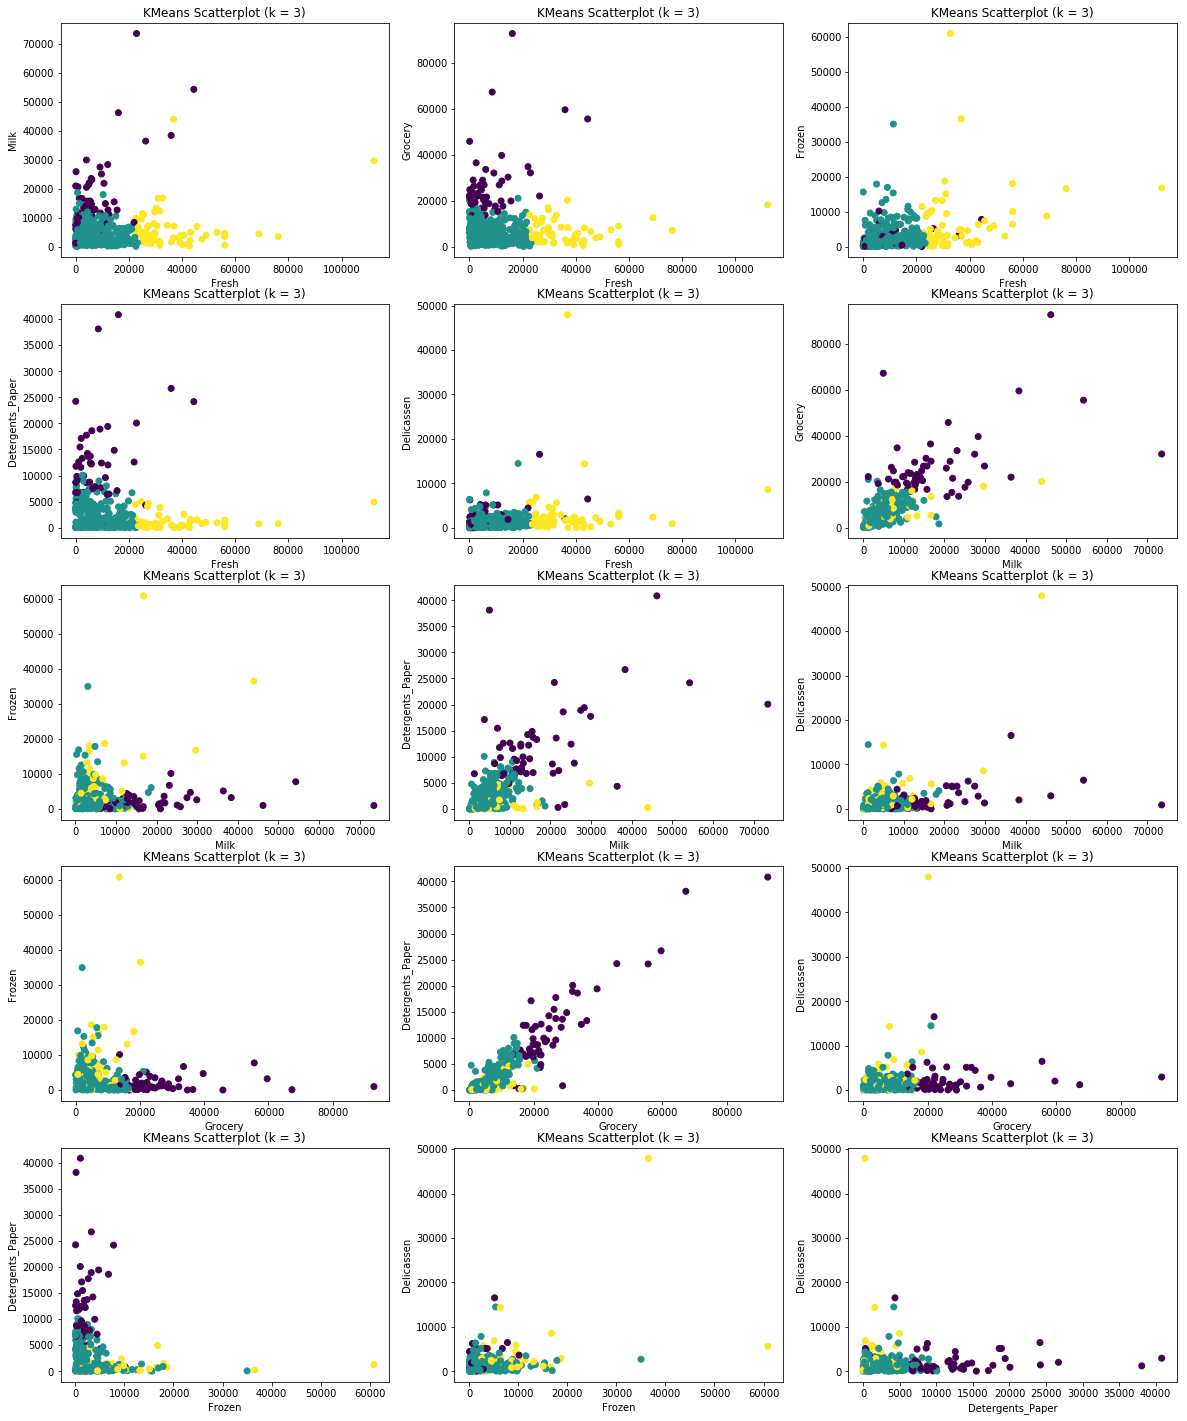

In [62]:
xlabel = [label[j] for j in range(0,30,2)]
ylabel = [label[s] for s in range(1,30,2)]
km = cluster.KMeans(n_clusters = 3, random_state = 0)
fig=plt.figure(figsize=(20, 25))
for i in range(15):
    km.fit(sale)
    plt.subplot(5,3,i+1)
    plt.scatter(k[i][:,0],k[i][:,1], c=km.labels_)
    plt.title('KMeans Scatterplot (k = 3)')
    plt.xlabel(xlabel[i])
    plt.ylabel(ylabel[i])
plt.savefig('kmeans.png')

### Q3
Run k-means for each possible value of k in the set {3, 5, 10}. Complete the following table with the between cluster distance BC, within cluster distance WC and ratio BC/WC of the set of clusters obtained for each k. Briefly comment on the obtained results.

In [103]:
def dist(vec1, vec2):
    return np.sum(np.square(vec1-vec2))

def BC(n):
    b = np.zeros(n)
    km = cluster.KMeans(n_clusters = n, random_state = 0)
    km.fit(sale)
    l = 1
    arr = []
    for j in range(n-1):
        for i in range(l,n):
            arr.append(dist(km.cluster_centers_[j] ,km.cluster_centers_[i]))
        l+=1
    arr = np.asarray(arr)
    return arr.sum()

def WC(n):
    km = cluster.KMeans(n_clusters = n, random_state = 0)
    km.fit(sale)
    arr = []
    for h in range(len(sale)):
        for i in range(n):
            if km.labels_[h] == i: 
                arr.append(dist(sale.iloc[h,:],km.cluster_centers_[i]))
    arr = np.asarray(arr)
    return arr.sum()

def ratio(n):
    rate = '%.2f%%' % (BC(n)/WC(n) * 100)
    return rate

In [104]:
table = pd.DataFrame({'k = 3' : [int(BC(3)), int(WC(3)), ratio(3)], 'k = 5' : [int(BC(5)), int(WC(5)), ratio(5)], 
                    'k = 10' : [int(BC(10)), int(WC(10)), ratio(10)]}, index = ['BC', 'WC', 'BC/WC'], columns = ['k = 3', 'k = 5', 'k = 10'])
table

,k = 3,k = 5,k = 10
BC,3110621948,23401168600,216814643185
WC,80342166920,53019062599,29734145058
BC/WC,3.87%,44.14%,729.18%
